In [1]:
%matplotlib inline 
import random
import torch
from d2l import torch as d2l


In [2]:
def synthetic_data(w,b,num):
    X = torch.normal(0, 1, (num, len(w)))
    y:torch.Tensor = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

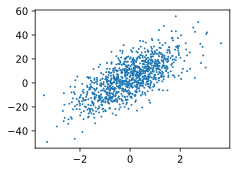

In [14]:
true_w = torch.tensor([10, -10.])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
d2l.plt.scatter(features[:,(0)].detach().numpy(), labels.detach().numpy(), 1);

In [15]:
def data_iter(batch_size, features, labels):
    num = len(features)
    indices = list(range(num))
    random.shuffle(indices)
    for i in range(0, num, batch_size):
        batch_indices = torch.tensor(indices[i : min(i + batch_size, num)])
        yield features[batch_indices], labels[batch_indices]

In [16]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.9436,  0.6463],
        [ 0.6798,  1.1949],
        [-2.6431, -1.3658],
        [ 0.2526, -1.9510],
        [ 0.2575,  0.5874],
        [ 0.7005,  0.1454],
        [ 1.2236, -1.2664],
        [ 1.0129,  1.0317],
        [-0.9888,  0.7496],
        [-0.7911,  0.7758]]) 
 tensor([[-11.7118],
        [ -0.9467],
        [ -8.5763],
        [ 26.2376],
        [  0.9125],
        [  9.7435],
        [ 29.1044],
        [  4.0047],
        [-13.1549],
        [-11.4673]])


In [32]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [29]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

def loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [38]:
lr = 0.03
num_epochs = 5
net = linreg
loss = loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean())}')

epoch 1, loss 4.9282174586551264e-05
epoch 2, loss 4.92293038405478e-05
epoch 3, loss 4.914861710858531e-05
epoch 4, loss 4.928474663756788e-05
epoch 5, loss 4.926899782731198e-05
